## Лабораторная работа №3.5 Метод K блиайших соседей


### Загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


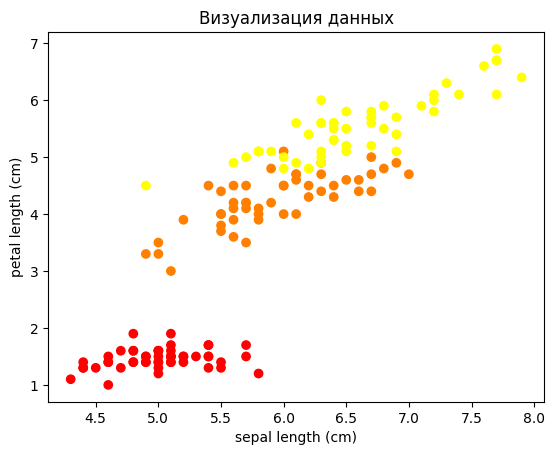

In [2]:
X = data.iloc[:, [0, 2]]
y = iris.target

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация данных")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### Нормализируем данные

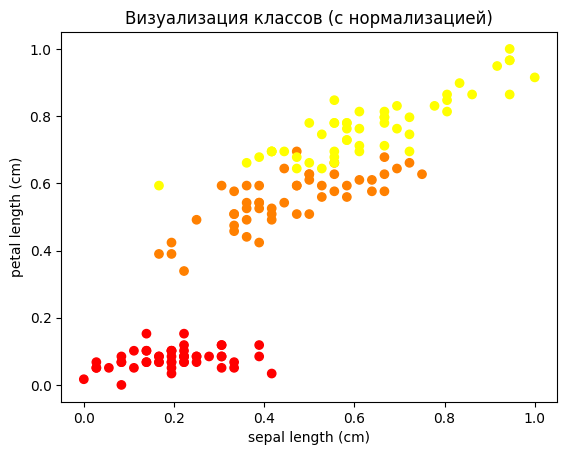

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов (с нормализацией)")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### Модель классификации

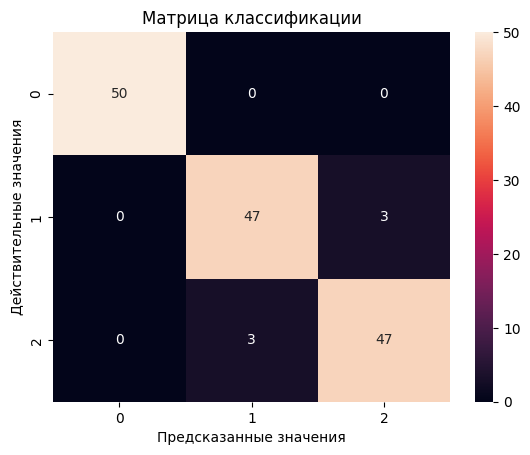

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')

plt.title("Матрица классификации")
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print(classification_report(y_pred, y))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


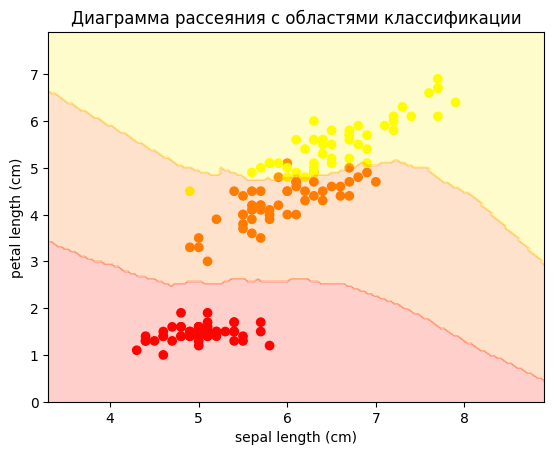

In [5]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.title("Диаграмма рассеяния с областями классификации")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

### Новое наблюдение

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


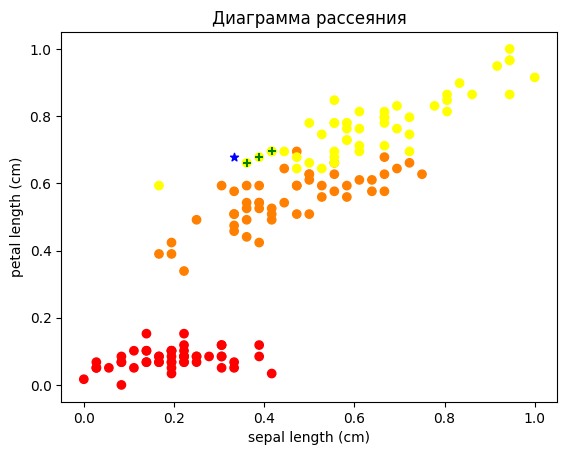

In [6]:
observation_new = [[5.5, 5]]

observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)
knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Задания для самостоятельного выполнения

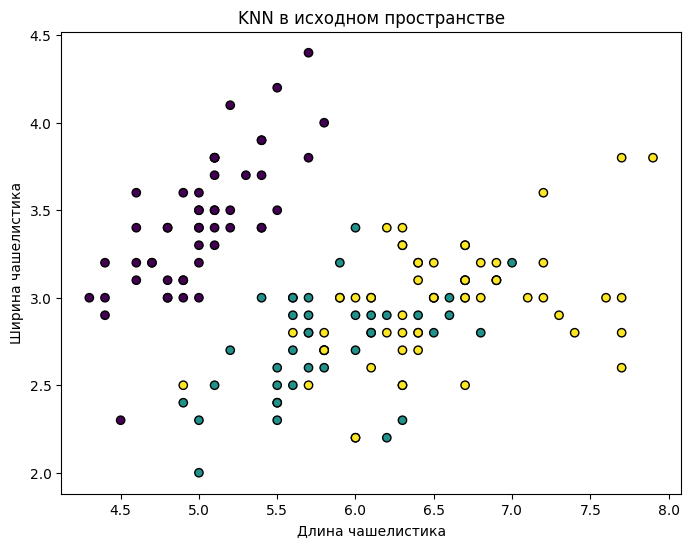

In [7]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('KNN в исходном пространстве')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

k_values = [3, 5, 10]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    acc = accuracy_score(y, y_pred)

    print(f'Точность при k={k}: {acc}')

Точность при k=3: 0.8533333333333334
Точность при k=5: 0.84
Точность при k=10: 0.84


In [9]:
new_point = np.array([[10.0, 11.0]])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
new_point_scaled = scaler.transform(new_point)

print(f'Нормализация нового объекта: {new_point_scaled}')
print(f'Нормализация старого объекта: {observation_new_scaled}')


Нормализация нового объекта: [[1.58333333 3.75      ]]
Нормализация старого объекта: [[0.33333333 0.6779661 ]]


In [10]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    acc = accuracy_score(y, y_pred)

    print(f'Метрика: {metric}')
    print(f'точность: {acc}')

Метрика: euclidean
точность: 0.8533333333333334
Метрика: manhattan
точность: 0.8533333333333334
Метрика: chebyshev
точность: 0.8666666666666667


In [11]:
from sklearn.model_selection import train_test_split


X_full = iris.data
y_full = iris.target
X_full_scaled = MinMaxScaler().fit_transform(X_full)
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y_full, test_size=0.2, random_state=42)
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)

print('Точность: ', accuracy_score(y_test, y_pred_full))

Точность:  1.0


In [12]:
knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_weighted.fit(X_train, y_train)

y_pred_weighted = knn_weighted.predict(X_test)

print(f'Точность с взвешенными соседями: {accuracy_score(y_test, y_pred_weighted):.2f}')

Точность с взвешенными соседями: 1.00


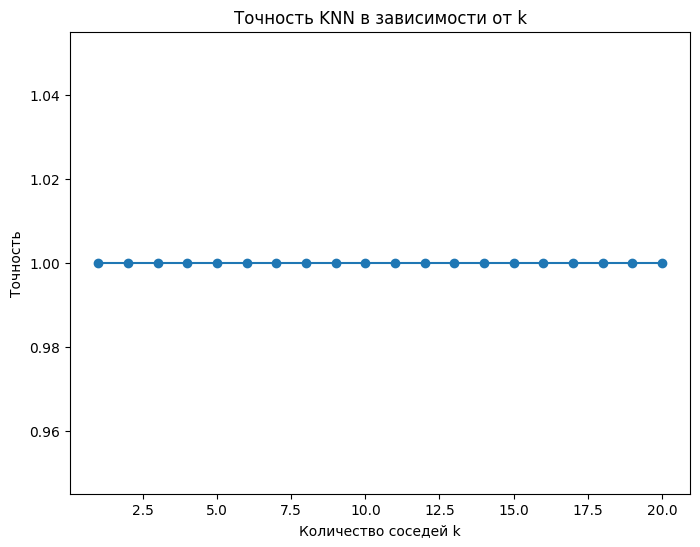

In [13]:
k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracies, marker='o')

plt.title('Точность KNN в зависимости от k')
plt.xlabel('Количество соседей k')
plt.ylabel('Точность')
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X_reg = data.data
y_reg = data.target
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f'MSE: {mse}')

MSE: 1.1186823858768293
